# CLIPBOARD HEALTH SALES ANALYSIS

## Business Understanding
### Overview
Clipboard Health is a nationwide staffing platform specializing in providing staffing to long-term care facilities. The Centers for Medicaid and Medicare Services publish a quarterly report containing daily staffing data for all registered nursing homes in the US. I have been tasked to use the PBJ data and any other CMS data that you see fit to make a few recommendations to the Clipboard Health sales leadership team, using Q1 data.

### Objectives
The objective of this analysis is to evaluate the staffing data to identify trends, inefficiencies, and opportunities that can be leveraged to improve Clipboard Health’s staffing strategies and sales approach. 

### Analytical questions

1. Staffing Trends: What are the current staffing trends in nursing homes for Q1 2024? How do these trends vary by state, city, or county?

2. Workforce Allocation: What is the distribution of staffing hours between full-time employees and contractors? Are there any significant disparities that need to be addressed?

3. Geographical Analysis: Are there specific regions where staffing levels are consistently high or low? How can Clipboard Health tailor its offerings based on these regional differences?

4. Operational Efficiency: Are there any patterns in staffing hours that suggest inefficiencies or potential areas for improvement? How can Clipboard Health’s solutions address these inefficiencies?

5. Competitive Positioning: How do the staffing levels at facilities serviced by Clipboard Health compare to those serviced by competitors? What can be learned to enhance Clipboard Health’s market positioning and sales strategy?

## Data Understanding

In [19]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading my dataset
data = pd.read_csv('Dataset/PBJ_Daily_Nurse_Staffing_Q1_2024.csv', encoding='latin1')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21052\312646179.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Dataset/PBJ_Daily_Nurse_Staffing_Q1_2024.csv', encoding='latin1')


In [6]:
#DisplayIng the first few rows of the data
data.head(5)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,...,0.0,147.15,147.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,...,0.0,142.21,142.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Checking datatypes of the columns in my data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [8]:
#checking for null values
data.isna().sum()

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [9]:
#checking if there are any duplicates in my data
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1330961    False
1330962    False
1330963    False
1330964    False
1330965    False
Length: 1330966, dtype: bool

#### Observations
- There are no nulls
- I have to convert the workdate column to date time for filtering and easier analysis
- There are no nulls in myy data
- There are 33 columns

## Data Cleaning

In [10]:
#Converting 'WorkDate' to datetime format to help in filtering and performing operations
data['WorkDate'] = pd.to_datetime(data['WorkDate'].astype(str), format='%Y%m%d')

#Verifying the conversion by displaying the first 5 rows of 'WorkDate'
print(data['WorkDate'].head())

0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: WorkDate, dtype: datetime64[ns]


In [11]:
#Converting string columns to categorical columns to help in analysis o the columns
categorical_columns = ['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME']
for col in categorical_columns:
    data[col] = data[col].astype('category')

## Exploratory Data Analysis (EDA)

In [15]:
#Summary statistics
data.describe().T

,count,mean,min,25%,50%,75%,max,std
COUNTY_FIPS,1330966.0,91.106454,1.0,31.0,69.0,117.0,840.0,99.202071
WorkDate,1330966,2024-02-14 23:59:59.999999744,2024-01-01 00:00:00,2024-01-23 00:00:00,2024-02-15 00:00:00,2024-03-09 00:00:00,2024-03-31 00:00:00,NaN
MDScensus,1330966.0,83.422048,0.0,51.0,76.0,104.0,743.0,49.137679
Hrs_RNDON,1330966.0,5.202604,0.0,0.0,8.0,8.0,327.75,4.54822
Hrs_RNDON_emp,1330966.0,5.108919,0.0,0.0,8.0,8.0,327.75,4.53997
Hrs_RNDON_ctr,1330966.0,0.093686,0.0,0.0,0.0,0.0,42.0,0.908553
Hrs_RNadmin,1330966.0,10.256901,0.0,0.0,7.5,16.0,266.15,14.850955
Hrs_RNadmin_emp,1330966.0,10.013296,0.0,0.0,7.35,16.0,266.15,14.608319
Hrs_RNadmin_ctr,1330966.0,0.243605,0.0,0.0,0.0,0.0,92.5,1.848301
Hrs_RN,1330966.0,34.423581,0.0,13.0,25.58,44.79,908.62,34.684612


#### Univariate analysis

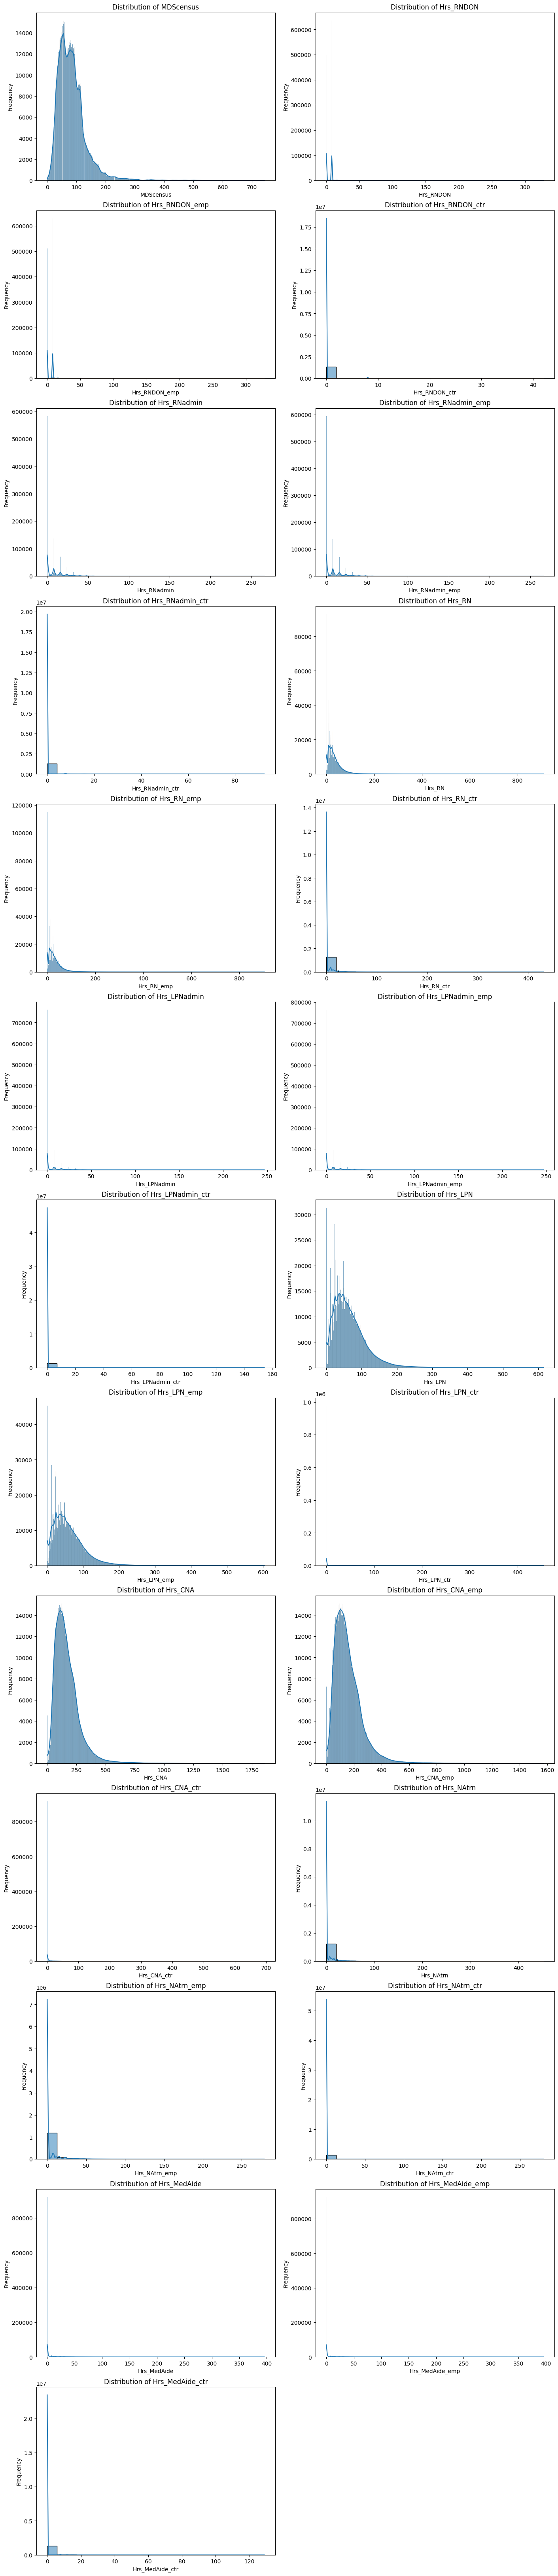

In [23]:
#Numerical Variables
numerical_columns = ['MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 
                      'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr',
                      'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
                      'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn', 
                      'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp', 
                      'Hrs_MedAide_ctr']

#Determine number of rows needed
num_vars = len(numerical_columns)
num_rows = (num_vars + 1) // 2

#Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, num_rows * 5), constrained_layout=True)

#Flatten the axes array for easy iteration
axes = axes.flatten()

#Plot histograms
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

#Hide unused subplots (if any)
for j in range(num_vars, len(axes)):
    fig.delaxes(axes[j])

plt.show()


c:\Users\Georginah\Data Analytics Projects\Clipboard-Health-Q1-Sales\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Georginah\Data Analytics Projects\Clipboard-Health-Q1-Sales\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


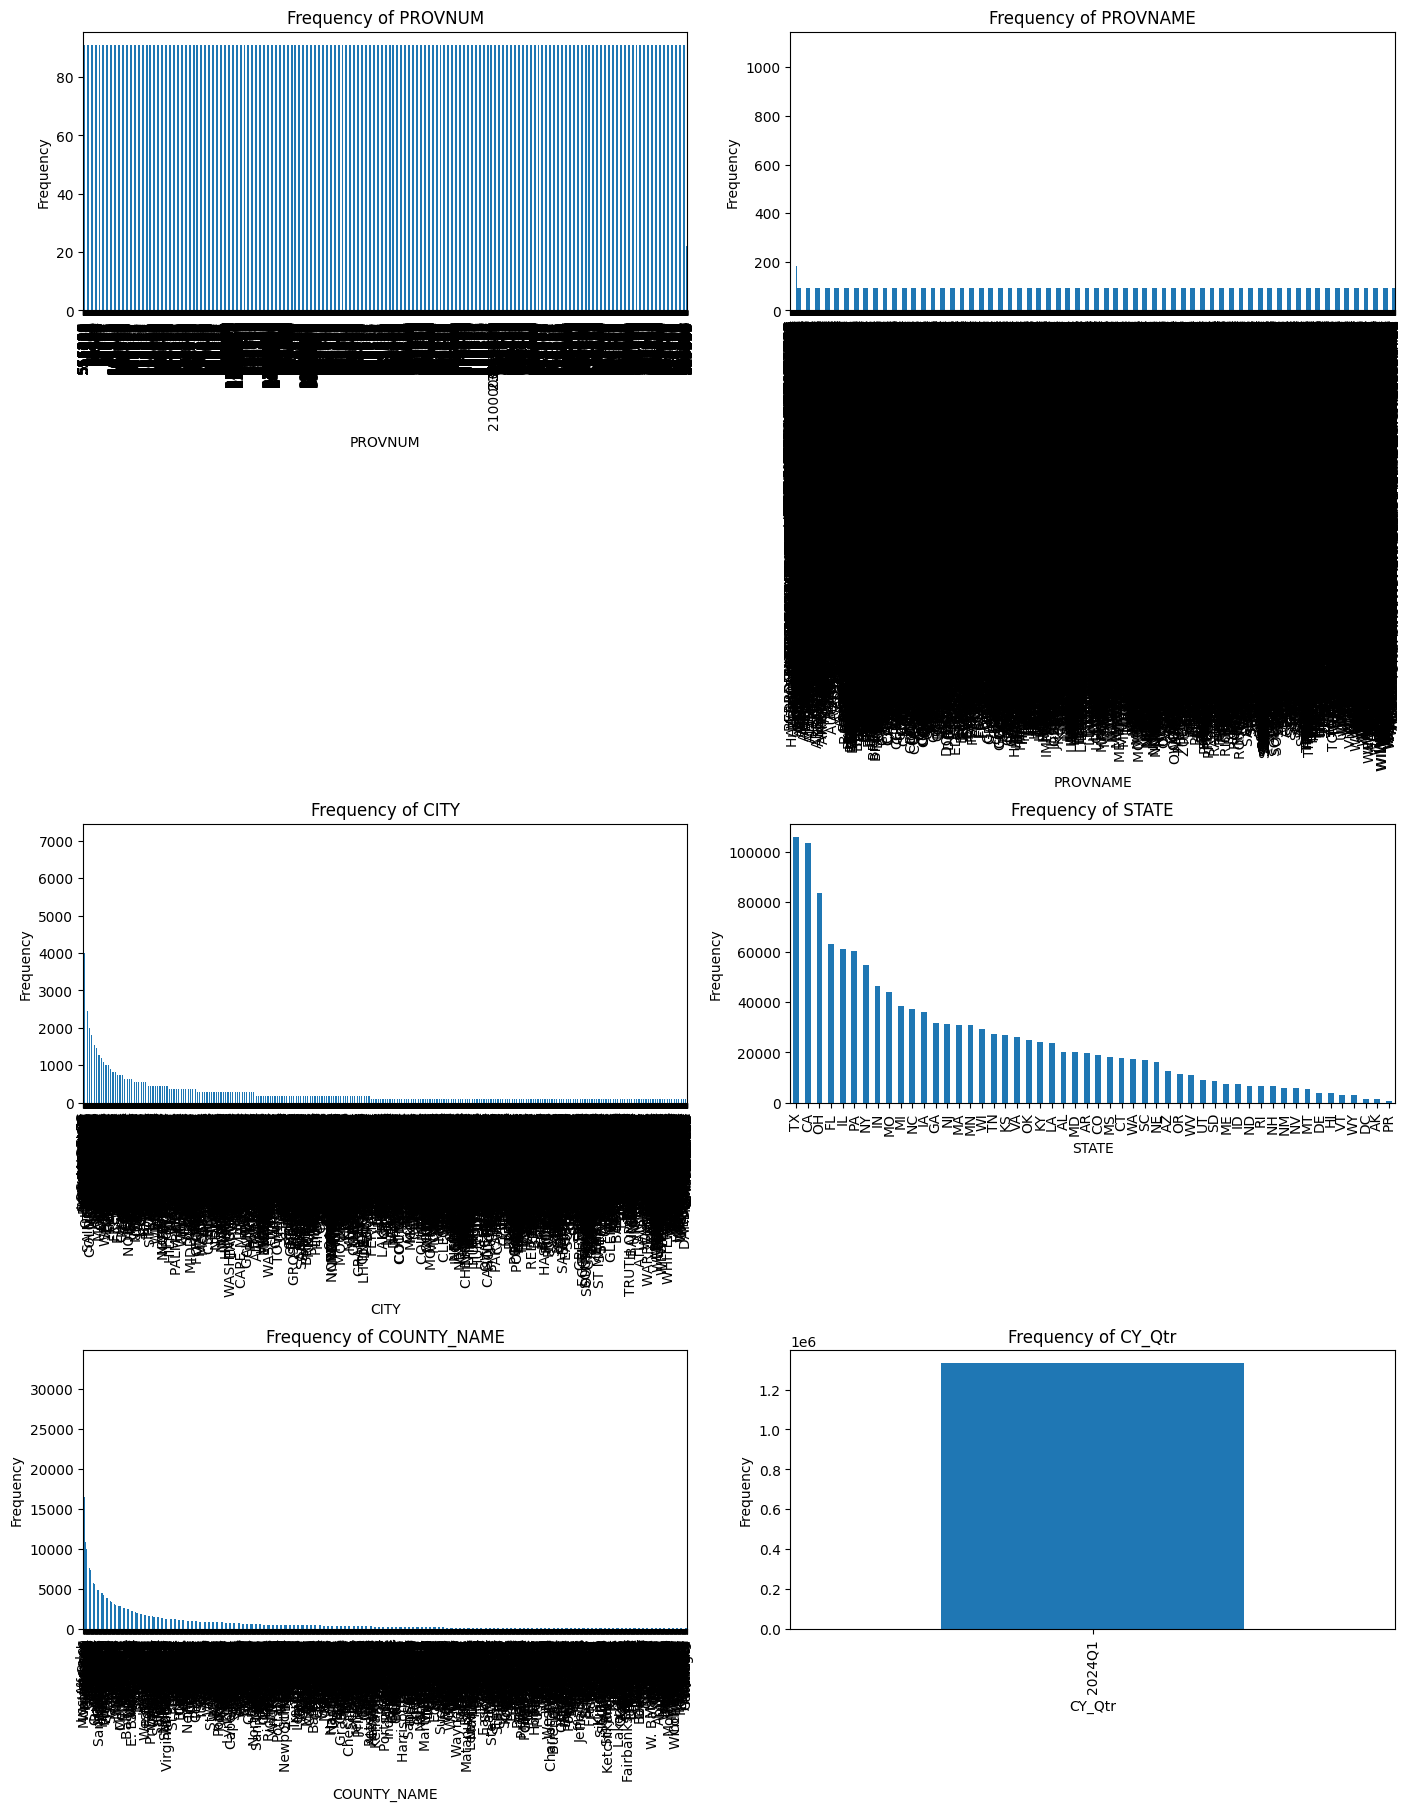

In [24]:
#Categorical Variables
categorical_columns = ['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'CY_Qtr']

#Determine number of rows needed
num_vars = len(categorical_columns)
num_rows = (num_vars + 1) // 2

#Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, num_rows * 6), constrained_layout=True)

#Flatten the axes array for easy iteration
axes = axes.flatten()

#Plot bar charts
for i, col in enumerate(categorical_columns):
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=90)

plt.show()


#### Bivariate analysis

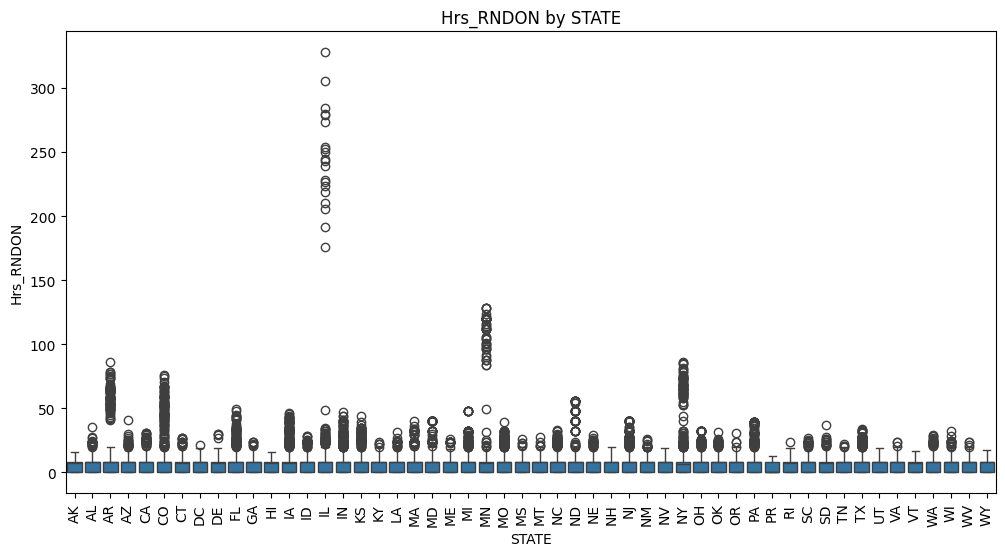

In [25]:
#Box plots for categorical vs numerical
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='Hrs_RNDON', data=data)
plt.title('Hrs_RNDON by STATE')
plt.xlabel('STATE')
plt.ylabel('Hrs_RNDON')
plt.xticks(rotation=90)
plt.show()

                  COUNTY_FIPS  MDScensus  Hrs_RNDON  Hrs_RNDON_emp  \
COUNTY_FIPS          1.000000  -0.052989   0.006396       0.006802   
MDScensus           -0.052989   1.000000   0.035340       0.040456   
Hrs_RNDON            0.006396   0.035340   1.000000       0.980013   
Hrs_RNDON_emp        0.006802   0.040456   0.980013       1.000000   
Hrs_RNDON_ctr       -0.001974  -0.025243   0.108952      -0.090973   
Hrs_RNadmin         -0.075940   0.407398   0.280202       0.281916   
Hrs_RNadmin_emp     -0.074404   0.399604   0.280532       0.283500   
Hrs_RNadmin_ctr     -0.022104   0.115085   0.034177       0.024487   
Hrs_RN              -0.127631   0.572492   0.043880       0.047209   
Hrs_RN_emp          -0.123106   0.525804   0.050048       0.055174   
Hrs_RN_ctr          -0.052748   0.314043  -0.004531      -0.008776   
Hrs_LPNadmin         0.060896   0.190690   0.256424       0.255026   
Hrs_LPNadmin_emp     0.061311   0.188989   0.257817       0.257249   
Hrs_LPNadmin_ctr    

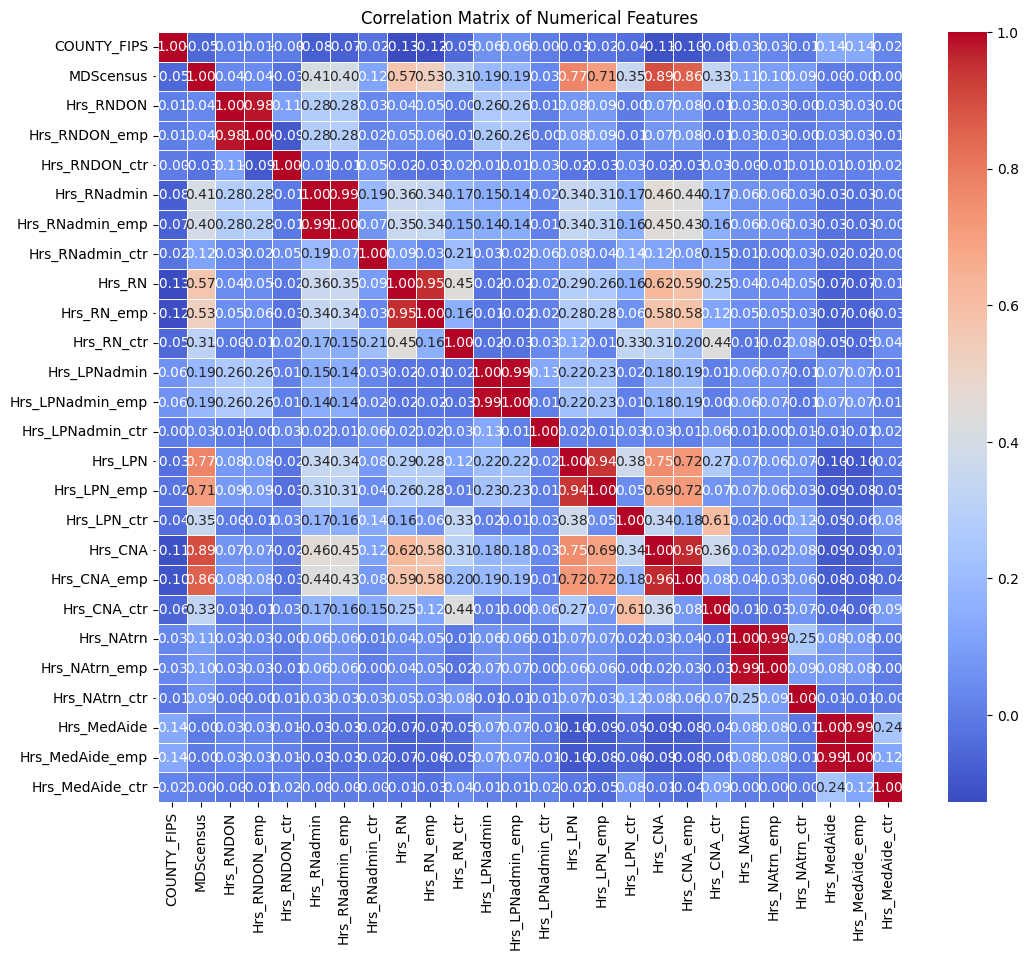

In [26]:
#correlation
# Filter to include only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Print the correlation matrix
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observations
 - Hrs_RNDON and Hrs_RNDON_emp have a high positive correlation (0.98), indicating that these variables are very closely related. This is expected if Hrs_RNDON_emp represents the hours worked by employees in the Hrs_RNDON category.

- Hrs_RN and Hrs_RNadmin have a moderate positive correlation (0.28), suggesting a moderate relationship between the total hours of RN and RN administration hours.

- Hrs_RN and Hrs_RN_emp: These have a moderate positive correlation (0.05), indicating a weaker relationship.

- COUNTY_FIPS and MDScensus: These have a very weak negative correlation (-0.05), suggesting there is minimal relationship between these two variables.

- Hrs_LPN and Hrs_LPN_emp: These have a strong positive correlation (0.77), indicating that as the hours for LPN increase, hours worked by LPN employees also increase significantly.

## Answering analytical questions

1. Staffing Trends: What are the current staffing trends in nursing homes for Q1 2024? How do these trends vary by state, city, or county?

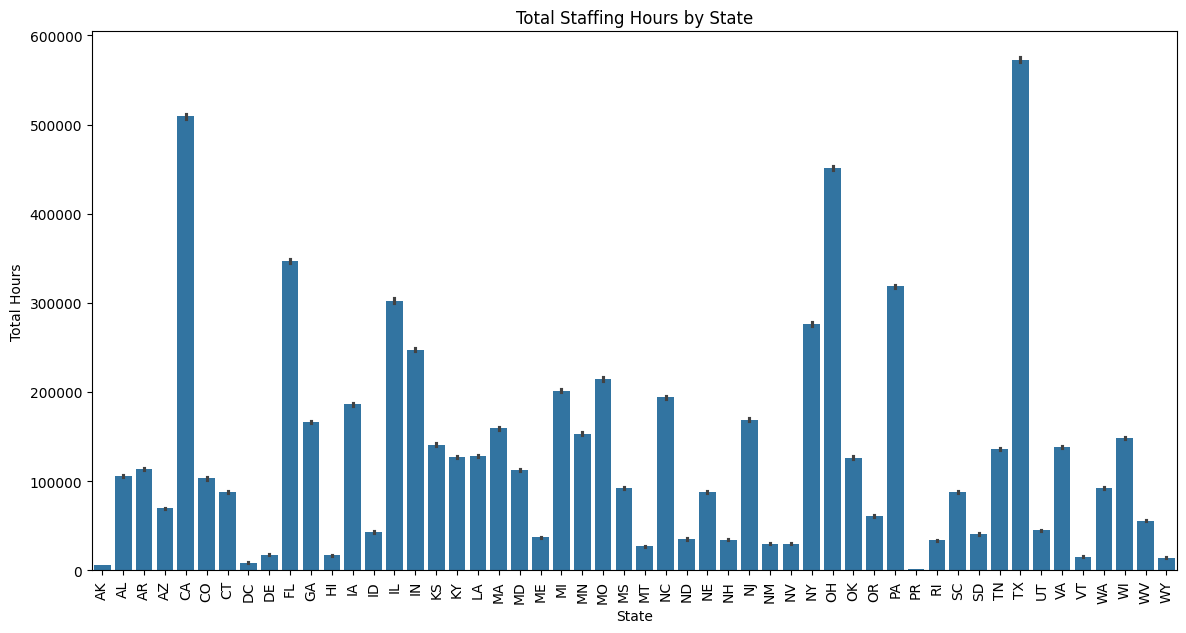

In [27]:
plt.figure(figsize=(14, 7))
sns.barplot(x='STATE', y='Hrs_RNDON', data=data, estimator=sum)
plt.title('Total Staffing Hours by State')
plt.xlabel('State')
plt.ylabel('Total Hours')
plt.xticks(rotation=90)
plt.show()

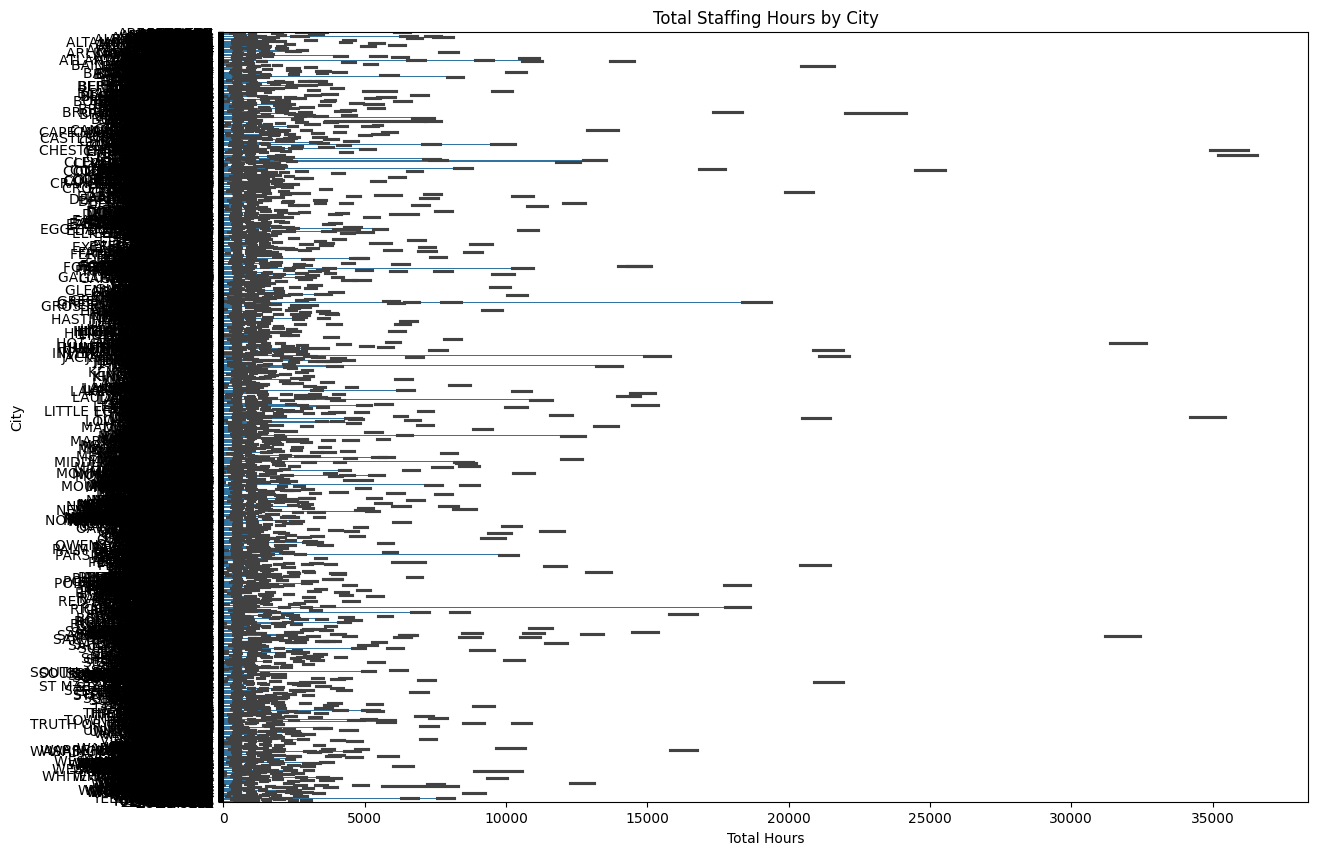

In [30]:

plt.figure(figsize=(14, 10))
sns.barplot(x='Hrs_RNDON', y='CITY', data=data, estimator=sum, orient='h')
plt.title('Total Staffing Hours by City')
plt.xlabel('Total Hours')
plt.ylabel('City')
plt.show()



2. Workforce Allocation: What is the distribution of staffing hours between full-time employees and contractors? Are there any significant disparities that need to be addressed?

         Type         Hours
0    Employee  3.774699e+08
1  Contractor  3.075631e+07


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21052\2913873183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Hours', data=summary_df, palette='viridis')


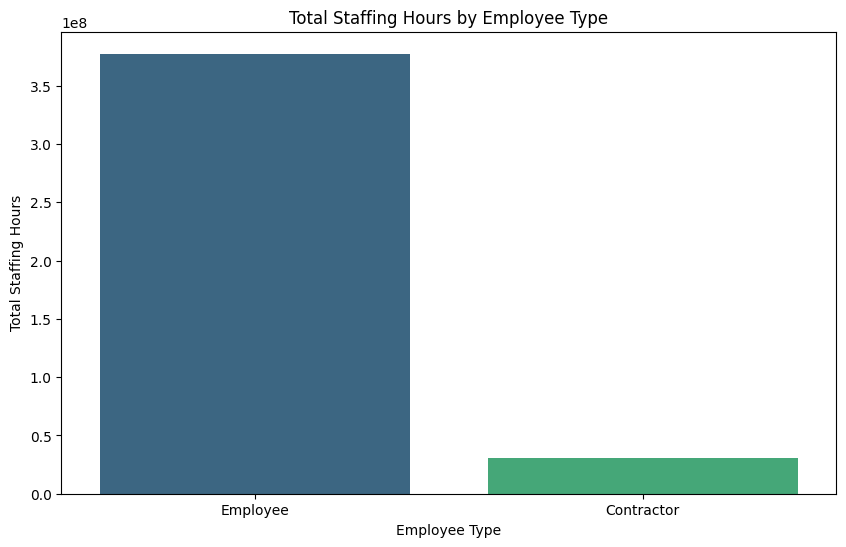

In [34]:
# Sum staffing hours for employees and contractors
employee_hours = data.filter(like='_emp').sum()
contractor_hours = data.filter(like='_ctr').sum()

# Create a DataFrame for visualization
summary_df = pd.DataFrame({
    'Type': ['Employee', 'Contractor'],
    'Hours': [employee_hours.sum(), contractor_hours.sum()]
})

print(summary_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Hours', data=summary_df, palette='viridis')
plt.title('Total Staffing Hours by Employee Type')
plt.xlabel('Employee Type')
plt.ylabel('Total Staffing Hours')
plt.show()




3. Geographical Analysis: Are there specific regions where staffing levels are consistently high or low? How can Clipboard Health tailor its offerings based on these regional differences?

Empty DataFrame
Columns: [Region, Total Staffing Hours]
Index: []


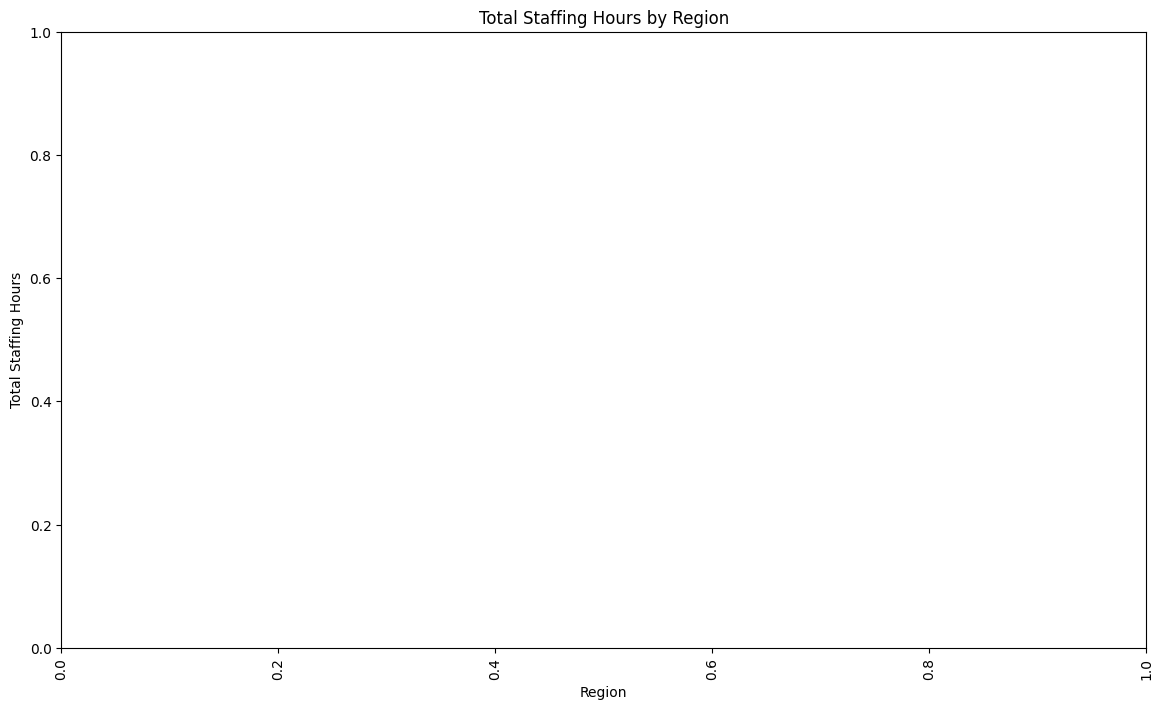

In [38]:


# Convert categorical columns to numeric if necessary
for column in data.columns:
    if data[column].dtype.name == 'category':
        data[column] = pd.to_numeric(data[column], errors='coerce')

# Ensure correct columns for aggregation
numeric_columns = data.filter(like='_emp').columns.tolist() + data.filter(like='_ctr').columns.tolist()

# Aggregate staffing hours by region
regional_summary = data.groupby('STATE')[numeric_columns].sum()

# Calculate total staffing hours
staffing_summary = regional_summary.sum(axis=1)

# Create summary DataFrame
regional_df = pd.DataFrame({
    'Region': staffing_summary.index,
    'Total Staffing Hours': staffing_summary.values
})

# Print the DataFrame
print(regional_df.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Total Staffing Hours', data=regional_df.sort_values(by='Total Staffing Hours', ascending=False), palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Total Staffing Hours by Region')
plt.xlabel('Region')
plt.ylabel('Total Staffing Hours')
plt.show()



4. Operational Efficiency: Are there any patterns in staffing hours that suggest inefficiencies or potential areas for improvement? How can Clipboard Health’s solutions address these inefficiencies?

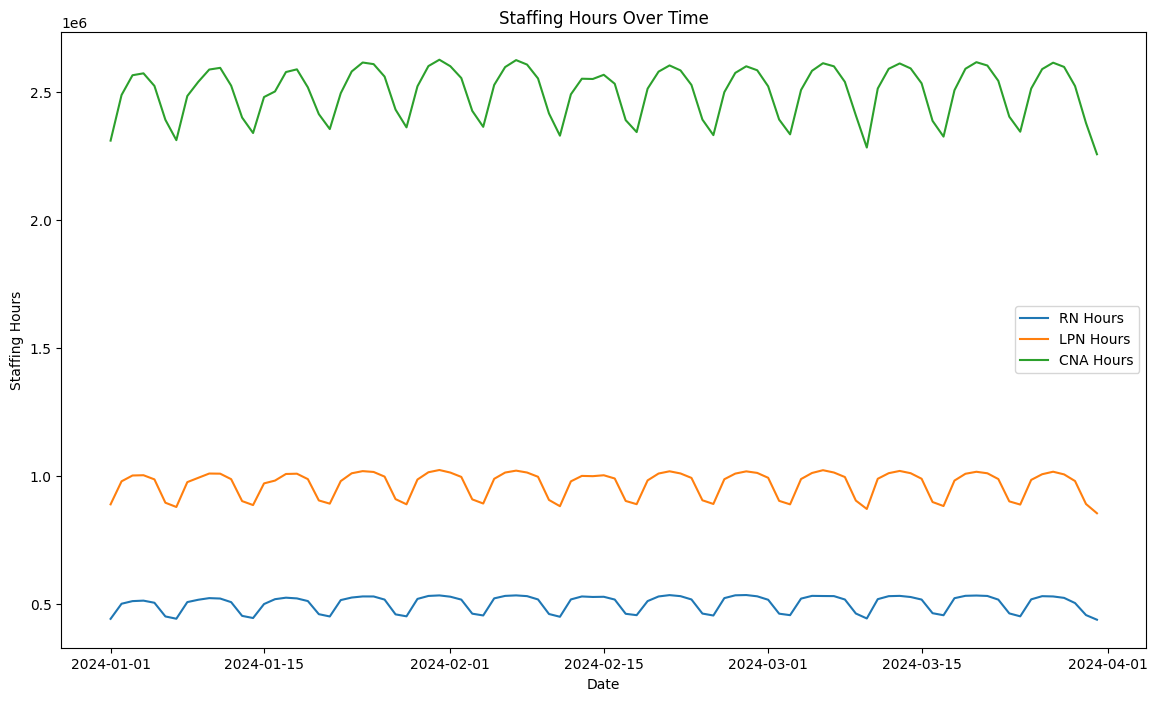

In [40]:
# Aggregate staffing hours over time
time_series = data.groupby('WorkDate').sum()[['Hrs_RN', 'Hrs_LPN', 'Hrs_CNA']]

# Plot time series
plt.figure(figsize=(14, 8))
plt.plot(time_series.index, time_series['Hrs_RN'], label='RN Hours')
plt.plot(time_series.index, time_series['Hrs_LPN'], label='LPN Hours')
plt.plot(time_series.index, time_series['Hrs_CNA'], label='CNA Hours')
plt.xlabel('Date')
plt.ylabel('Staffing Hours')
plt.title('Staffing Hours Over Time')
plt.legend()
plt.show()

5. Competitive Positioning: How do the staffing levels at facilities serviced by Clipboard Health compare to those serviced by competitors? What can be learned to enhance Clipboard Health’s market positioning and sales strategy?